<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Superintelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [1]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
env = gym.make('CartPole-v0')

In [4]:
# env.seed()

In [5]:
action_size = env.action_space.n
action_size

2

In [6]:
[env.action_space.sample() for _ in range(10)]

[1, 0, 0, 0, 0, 1, 1, 1, 1, 0]

In [7]:
state_size = env.observation_space.shape[0]
state_size

4

In [8]:
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

(array([ 0.03408241,  0.0100847 ,  0.02216894, -0.01338563], dtype=float32),
 {})

In [9]:
state, reward, done, trunc, _ = env.step(env.action_space.sample())
state, reward, done, trunc, _

(array([ 0.0342841 ,  0.20488182,  0.02190123, -0.29899237], dtype=float32),
 1.0,
 False,
 False,
 {})

In [10]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()[0]
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, trunc, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110:
        data = pd.concat((data, pd.DataFrame(results)))
        length.append(treward)

CPU times: user 2.98 s, sys: 88.2 ms, total: 3.07 s
Wall time: 3 s


In [11]:
np.array(length).mean()

116.0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 109
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      928 non-null    float32
 1   s2      928 non-null    float32
 2   s3      928 non-null    float32
 3   s4      928 non-null    float32
 4   a       928 non-null    int64  
 5   r       928 non-null    float64
dtypes: float32(4), float64(1), int64(1)
memory usage: 36.2 KB


In [13]:
data.tail()

,s1,s2,s3,s4,a,r
105,1.484983,2.462130,-0.058777,-1.138378,1,1.0
106,1.534226,2.657969,-0.081545,-1.448900,1,1.0
107,1.587385,2.853993,-0.110523,-1.765907,0,1.0
108,1.644465,2.660280,-0.145841,-1.509538,1,1.0
109,1.697671,2.856837,-0.176031,-1.843969,0,1.0


In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [15]:
from pylab import plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [16]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [17]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [18]:
from keras.layers import Dense
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [20]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

CPU times: user 320 ms, sys: 64.3 ms, total: 384 ms
Wall time: 286 ms


In [21]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.649625,0.615903,0.672042,0.629032
23,0.649455,0.614555,0.679040,0.618280
24,0.648069,0.628032,0.674550,0.629032


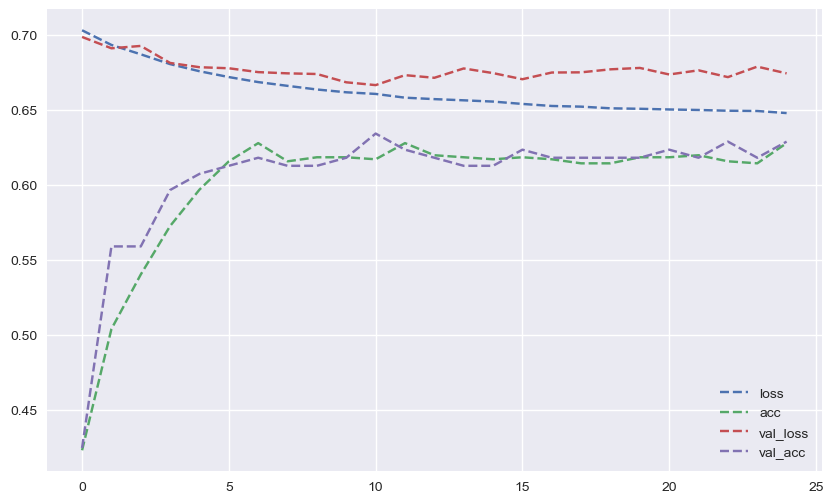

In [22]:
res.plot(figsize=(10, 6), style='--');

In [23]:
def epoch():
    print('|', end='')
    done = False
    state = env.reset()[0]
    trunc = False
    treward = 0
    while not done and not trunc:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, trunc, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [24]:
epoch()

|

200.0

In [25]:
%%time
res = np.array([epoch() for _ in range(100)])
print()
res

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CPU times: user 6.07 s, sys: 691 ms, total: 6.76 s
Wall time: 6.01 s


array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [26]:
res.mean()

200.0

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>